# CMPT 2091 Final Project: Data Management and Analysis with Yelp API and Apache Spark

### Group Members:
- Sabina Elumelu
- Maryben Chiatoh
- Khowla Khattak


### **Part One: Data Collection with Yelp API**


1.1 - Setup Yelp API
Before collecting data, you'll need to set up access to the Yelp API. Make sure you have your API key as outlined in the final project assignment document.

In [ ]:
# Set up the Yelp API Key
api_key = 'PrOExRvcBPwjTDdhrCLkjELaisnJBXw89Snjh-W0a9ERu_ttgPIUc2R-3sUJNWJenfWmMYKT3a-dyVuUM3NdiknDiRvftvQTXLtXD9njfKZO4I-_gq2dvRU7rd3yZ3Yx'

# Replace with your API key

# Yelp API endpoint for Business Search
endpoint_url = 'https://api.yelp.com/v3/businesses/search'

# Headers for authenticating the API request
headers = {
    'Authorization': f'Bearer {api_key}',
 }


1.2 - Making an API Request and Extracting Data
Use the Yelp API to fetch data based on your business idea. Adjust the parameters as necessary (location, categories, price range, etc.).

In [ ]:
import requests
import pandas as pd

cities = ['Edmonton', 'Calgary']
terms = ['restaurants', 'cafes', 'bakeries', 'food trucks', 'delis']
offsets = [0, 50, 100, 150]
all_businesses = []

# Define the search parameters (customize based on your business idea)
for city in cities:
    for term in terms:
        for offset in offsets:
            params = {
                'location': city,  # You can change the location
                'term': term,      # You can change the search term
                'limit': 50,       # Max results per request
                'offset': offset,  # Pagination offset, modify to collect more data
            }

            # Making the GET request to Yelp API
            response = requests.get(endpoint_url, headers=headers, params=params)

            # Check if response was successful
            if response.status_code != 200:
                print(f"Error for {city} - {term} - offset {offset}: {response.status_code}")
                continue

            data = response.json()
            businesses = data.get('businesses', [])

            print(f"{city} - {term} - Offset {offset} -> {len(businesses)} results")  # Debug print

            # Store data for final combination
            all_businesses.extend(businesses)

# Create a DataFrame from all collected businesses
df_yelp_data = pd.DataFrame(all_businesses)
df_yelp_data = df_yelp_data.drop_duplicates('id') #Remove duplicates, as the offset and multiple terms might collect it again
# Display the first few rows of the DataFrame to inspect the data
print(df_yelp_data.head())

Edmonton - restaurants - Offset 0 -> 50 results
Edmonton - restaurants - Offset 50 -> 50 results
Edmonton - restaurants - Offset 100 -> 50 results
Edmonton - restaurants - Offset 150 -> 50 results
Edmonton - cafes - Offset 0 -> 50 results
Edmonton - cafes - Offset 50 -> 50 results
Edmonton - cafes - Offset 100 -> 50 results
Edmonton - cafes - Offset 150 -> 50 results
Edmonton - bakeries - Offset 0 -> 50 results
Edmonton - bakeries - Offset 50 -> 50 results
Edmonton - bakeries - Offset 100 -> 50 results
Edmonton - bakeries - Offset 150 -> 50 results
Edmonton - food trucks - Offset 0 -> 50 results
Edmonton - food trucks - Offset 50 -> 50 results
Edmonton - food trucks - Offset 100 -> 6 results
Edmonton - food trucks - Offset 150 -> 0 results
Edmonton - delis - Offset 0 -> 50 results
Edmonton - delis - Offset 50 -> 50 results
Edmonton - delis - Offset 100 -> 50 results
Edmonton - delis - Offset 150 -> 32 results
Calgary - restaurants - Offset 0 -> 50 results
Calgary - restaurants - Offset

1.3 - Save Data to CSV
Once the data is collected, save it to a CSV file for future use.

In [ ]:
# Save the extracted data into a CSV file
df_yelp_data.to_csv('yelp_data.csv', index=False)

**1.4 - Business Idea Explanation**

### Business Idea: Hidden Gems in Edmonton and Calgary - Resturants, Cafes, Diners etc.

Explain the purpose of your application and how the Yelp data you extracted will be used to support it. For example:

- **Business Idea**: A restaurant recommendation system for travelers.
- **Data Features Extracted**: Business name, ratings, price range, categories, and location.

These features are important because:
- **Business Name** helps identify places.
- **Ratings** help to suggest highly-rated businesses.
- **Price** helps to filter options based on budget.
- **Categories** assist in grouping businesses (e.g., restaurants, cafes).
- **Location** enables location-based recommendations.


## **Business Idea:** A system that finds hidden Gems in Edmonton and Calgary for people looking to try something new and support their local business

**Data Features:** Business name, review count, ratings, categories, location

These features are important because:

**Business Name:** Idenitfies places

**Review count:** helps us filter for the "hidden gem" qualification

**Categories:** Grouping businesses, if its a resturants, diner, cafe etc.

**Location:** Location-based recommendation as this is location in two cities.

# **Part Two: Data Management with Apache Spark**
**2.1- Setting Up PySpark**

Now that we have the Yelp data, we'll set up Apache Spark to handle large datasets.

In [ ]:
# Importing necessary libraries for PySpark
!pip install pyspark
!pip install findspark

import os

import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession

# Initialize the Spark session
spark = SparkSession.builder.appName('FinalProject').getOrCreate()

# Check if Spark session is initialized
spark

In [ ]:
df = spark.sql('''select 'spark' as hello''')
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



**2.2 - Normalizing and Cleaning Structured Columns**

Now that your data is loaded, identify any structured or nested fields that require normalization (e.g., categories, coordinates, location, attributes). Use this space to clean your data, normalize relevant fields, and prepare it for analysis.

**You can choose which fields to normalize based on the data analysis you'll be performing in Part Three.**

Consider using tools such as:
- `pandas.json_normalize()`
- `explode()`

Once you're done, display the cleaned DataFrame and ensure it's analysis-ready.

In [ ]:
print(df_yelp_data.columns)


Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'location',
       'phone', 'display_phone', 'distance', 'business_hours', 'attributes',
       'price'],
      dtype='object')


In [ ]:
response = requests.get(endpoint_url, headers=headers, params=params)
Yelp_data = response.json()
Yelp_data

{'businesses': [{'id': 'a7wbtvbDJ7KFSqeMYBhA3g',
   'alias': 'safeway-calgary-20',
   'name': 'Safeway',
   'image_url': '',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/safeway-calgary-20?adjust_creative=eHnDKvjLzCJLoYxp3mWpow&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=eHnDKvjLzCJLoYxp3mWpow',
   'review_count': 2,
   'categories': [{'alias': 'delis', 'title': 'Delis'},
    {'alias': 'sandwiches', 'title': 'Sandwiches'},
    {'alias': 'bakeries', 'title': 'Bakeries'}],
   'rating': 3.5,
   'coordinates': {'latitude': 51.0683995490798,
    'longitude': -114.061126616771},
   'transactions': [],
   'location': {'address1': '20-1818 Centre Street NE',
    'address2': '',
    'address3': '',
    'city': 'Calgary',
    'zip_code': 'T2E 2S6',
    'country': 'CA',
    'state': 'AB',
    'display_address': ['20-1818 Centre Street NE',
     'Calgary, AB T2E 2S6',
     'Canada']},
   'phone': '+14032763328',
   'display_phone': '+1 403-276-3328',
   'dis

In [ ]:
#START YOUR CODE HERE

# Drop unnecessary columns

# Removing image_url, is_closed_and phone as they are not useful for our analysis
df_yelp_data.drop(columns=['image_url', 'is_closed', 'phone'], inplace=True)

# Explode the 'categories' column in the DataFrame, creating a new row for each business hour entry
# The ignore_index=True option resets the index in the resulting DataFrame
df_yelp_data_exploded = df_yelp_data.explode('categories', ignore_index=True)

# Normalize the 'categories' column
categories_normalized = pd.json_normalize(df_yelp_data_exploded['categories'])

# Normalize the 'location' column
location_normalized = pd.json_normalize(df_yelp_data_exploded['location'])

# Combine the normalized DataFrames with the original DataFrame (excluding categories and location)
df_yelp_data_normalized = pd.concat(
    [df_yelp_data_exploded.drop(columns=['categories', 'location']), categories_normalized, location_normalized],
    axis=1
)

#END YOUR CODE HERE

In [ ]:
# Display the first few rows of the normalized DataFrame to review the combined structure and contents
df_yelp_data_normalized.head(5)

,id,alias,name,url,review_count,rating,coordinates,transactions,display_phone,distance,...,alias,title,address1,address2,address3,city,zip_code,country,state,display_address
0,gDFjUfoAdiRYNaHBgAPFhg,little-wolf-edmonton,Little Wolf,https://www.yelp.com/biz/little-wolf-edmonton?...,2,4.5,"{'latitude': 53.52060631866052, 'longitude': -...",[],,934.094295,...,newcanadian,Canadian (New),8424 109 Street NW,,None,Edmonton,T6G 1E2,CA,AB,"[8424 109 Street NW, Edmonton, AB T6G 1E2, Can..."
1,dHV02LqcZeVYyKlTO9-Btg,sylv-s-retro-diner-edmonton,Sylv’s Retro Diner,https://www.yelp.com/biz/sylv-s-retro-diner-ed...,1,5.0,"{'latitude': 53.48738, 'longitude': -113.45805}",[],+1 780-203-2886,5701.943691,...,burgers,Burgers,8707 51 Avenue NW,,None,Edmonton,T6E 5H1,CA,AB,"[8707 51 Avenue NW, Edmonton, AB T6E 5H1, Canada]"
2,3koeM2Blt-4rEmVIJAZf8Q,woodwork-edmonton,Woodwork,https://www.yelp.com/biz/woodwork-edmonton?adj...,186,4.2,"{'latitude': 53.5419431693898, 'longitude': -1...",[],+1 780-757-4100,1912.993215,...,newcanadian,Canadian (New),10132-100 Street,None,,Edmonton,T5J 0N8,CA,AB,"[10132-100 Street, Edmonton, AB T5J 0N8, Canada]"
3,3koeM2Blt-4rEmVIJAZf8Q,woodwork-edmonton,Woodwork,https://www.yelp.com/biz/woodwork-edmonton?adj...,186,4.2,"{'latitude': 53.5419431693898, 'longitude': -1...",[],+1 780-757-4100,1912.993215,...,cocktailbars,Cocktail Bars,10132-100 Street,None,,Edmonton,T5J 0N8,CA,AB,"[10132-100 Street, Edmonton, AB T5J 0N8, Canada]"
4,gtXAx_G5j6K1TmuJ2v5Rbg,rge-rd-edmonton,RGE RD,https://www.yelp.com/biz/rge-rd-edmonton?adjus...,193,4.3,"{'latitude': 53.5507814, 'longitude': -113.533...",[],+1 780-447-4577,2927.754959,...,newcanadian,Canadian (New),10643 - 123 Street,,,Edmonton,T5M 1Z1,CA,AB,"[10643 - 123 Street, Edmonton, AB T5M 1Z1, Can..."


In [ ]:
# Create a Spark DataFrame from the cleaned Pandas DataFrame
yelp_spark_df = spark.createDataFrame(df_yelp_data_normalized)

#Getting rid of any Duplicates
yelp_spark_df_unique = yelp_spark_df.dropDuplicates(['address1'])

# Preview the Spark DataFrame
yelp_spark_df.show(5)

+--------------------+--------------------+------------------+--------------------+------------+------+--------------------+------------+---------------+-----------------+--------------------+--------------------+-----+------------+--------------+------------------+--------+--------+--------+--------+-------+-----+--------------------+
|                  id|               alias|              name|                 url|review_count|rating|         coordinates|transactions|  display_phone|         distance|      business_hours|          attributes|price|       alias|         title|          address1|address2|address3|    city|zip_code|country|state|     display_address|
+--------------------+--------------------+------------------+--------------------+------------+------+--------------------+------------+---------------+-----------------+--------------------+--------------------+-----+------------+--------------+------------------+--------+--------+--------+--------+-------+-----+--------

# CODE EXPLANATION

- Some businesses have multiple categories in a list.
- The 'explode()' creates one row per category, making analysis easier (e.g., category-based filtering).
- Normalize 'categories' — if each row in this column is a dictionary json_normalize flattens it into individual columns (like alias, title).

### Part Three: Data Analysis Using Spark SQL
**3.1 - Register DataFrame as Temp View**

We need to register the Spark DataFrame as a temporary SQL view to run SQL queries.

In [ ]:
# Register DataFrame as a temporary SQL view
yelp_spark_df.createOrReplaceTempView("yelp_businesses")

**3.2 - Spark SQL Queries for Data Analysis**

Now, we can perform SQL queries to analyze the Yelp data. You need to perform an analysis of your data using Spark SQL and you should perform **a minimum of 10 SQL operations** to gain meaningful insights from the data you extraction from part one.

# BUSINESS QUESTIONS

- We aim to uncover hidden gems.
- Definition of "Hidden Gem"
      we define a hidden gem as:
      Located in Edmonton or Calgary
      Rating ≥ 4.5 (high quality)
      Review count between 50 and 100 (low visibility = hidden)
      Belongs to certain categories like “restaurant”, “food truck”, “cafe”, "delis".

1. Define Hidden Gem as a View for Easier Reuse

2. How many businesses exist in the entire data?

3. How many businesses have more than 100 reviews and high ratings?

4. What are the top 10 businesses in Calgary and Edmonton with the highest ratings?

5. What is the Average rating per city per category?

6. What are the top hidden gems in Edmonton and Calgary?

7. How many hidden gems exist in each city?

8. What categories are common among hidden gems?

9. Which neighborhoods (or postal codes) have the most hidden gems?

10. What’s the average rating of hidden gems vs. popular spots?

11. What are the top 5 hidden gems per city?

12. Are there underrated categories (high rating but few businesses)?

13. What is distribution of the review counts for the hidden gems?




In [ ]:
#UNIQUE BUSINESSES COUNT, BY NAME AND ADDRESS
distinct_business_count = spark.sql("""
    SELECT COUNT(DISTINCT name, address1) AS unique_business_count
    FROM yelp_businesses
""")

distinct_business_count.show()

+---------------------+
|unique_business_count|
+---------------------+
|                 1564|
+---------------------+



In [ ]:
#Checking for Duplicates
spark.sql("""
    SELECT name, address1, city, COUNT(*) as count
    FROM yelp_businesses
    GROUP BY name, address1, city
    HAVING COUNT(*) > 1
""").show()

+--------------------+--------------------+--------+-----+
|                name|            address1|    city|count|
+--------------------+--------------------+--------+-----+
|     Garden of Italy|101-2763 Sunridge...| Calgary|    2|
|      Paris Baguette|  10607 82 Avenue NW|Edmonton|    3|
|           Be Coffee|  11015 26 Avenue NW|Edmonton|    3|
|           CornerHUB|  8623 112 Street NW|Edmonton|    3|
|The Lemon Grass G...|108 Street and So...|Edmonton|    2|
|    Cactus Club Cafe|   2612 39 Avenue NE| Calgary|    2|
|     Xin Chao Coffee|   2255 32 Street NE| Calgary|    3|
|          Le TRAMWAY|          9420 91 St|Edmonton|    2|
|             Partake|       12431 102 Ave|Edmonton|    2|
|Dutch Delicious B...| 13232 118 Avenue NW|Edmonton|    3|
|     Mr Chimi Churri|       Jasper Avenue|Edmonton|    2|
|    Hu's Noodle Nook| 11238 104 Avenue NW|Edmonton|    3|
|  Culina On The Lake|     9330 Groat Road|Edmonton|    3|
| Italian Centre Shop|17010-90 Avenue N...|Edmonton|    

In [ ]:
# 1. Define Hidden Gem as a View for Easier Reuse
spark.sql("""
    CREATE OR REPLACE TEMP VIEW hidden_gems AS
    SELECT DISTINCT name, rating, review_count, city, address1, zip_code, title
    FROM yelp_businesses
    WHERE (city = 'Edmonton' OR city = 'Calgary')
        AND rating >= 4.5
        AND review_count BETWEEN 50 AND 100
""")

spark.sql("SELECT * FROM hidden_gems LIMIT 10").show()

+--------------------+------+------------+--------+--------------------+--------+--------------------+
|                name|rating|review_count|    city|            address1|zip_code|               title|
+--------------------+------+------------+--------+--------------------+--------+--------------------+
|Sucre Patisserie ...|   4.5|          50| Calgary|   1007  8 Street SW| T2R 0B5|Patisserie/Cake Shop|
|The Hexagon Board...|   4.6|          60|Edmonton|     10750 82 Ave NW| T6E 2A8|        Coffee & Tea|
|     Monogram Coffee|   4.5|          65| Calgary| 420 - 2nd Street SW| T2P 3K4|        Coffee & Tea|
|Sucre Patisserie ...|   4.5|          50| Calgary|   1007  8 Street SW| T2R 0B5|            Bakeries|
|        Klein Harris|   4.6|          76| Calgary|     110 8 Avenue SW| T2P 1B3|            Desserts|
|Alumni Sandwich &...|   4.7|          77| Calgary|       725 17 Ave SW| T2S 0B6|       Cocktail Bars|
|    Bodega Highlands|   4.5|          60|Edmonton|6509 112th Avenue NW| 

In [ ]:
# 2. How many businesses exist in the entire data?

business_count = spark.sql("""
    SELECT COUNT(*) as business_count
    FROM yelp_businesses
""")
business_count.show()

+--------------+
|business_count|
+--------------+
|          3102|
+--------------+



In [ ]:
# 3. How many businesses have more than 100 reviews and high ratings?

high_quality_businesses = spark.sql("""
    SELECT COUNT(*) as high_quality_count
    FROM yelp_businesses
    WHERE review_count > 100 AND rating >= 4.5
""")
high_quality_businesses.show()

+------------------+
|high_quality_count|
+------------------+
|                19|
+------------------+



In [ ]:
# 4. What are the top 10 businesses in Calgary and Edmonton with the highest ratings?

top_rated_businesses = spark.sql("""
    SELECT name, rating, review_count, city, address1
    FROM yelp_businesses
    WHERE city IN ('Edmonton', 'Calgary')
    ORDER BY rating DESC
    LIMIT 10
""")
top_rated_businesses.show()

+-------------------+------+------------+--------+--------------------+
|               name|rating|review_count|    city|            address1|
+-------------------+------+------------+--------+--------------------+
|Inasal Grill Avenue|   5.0|           1|Edmonton| 10752 Jasper Avenue|
|         Cafe Eight|   5.0|           3| Calgary|   609 8th Avenue SW|
|               MSSM|   5.0|           1|Edmonton| 10111 104 Avenue NW|
| Mondays Plant Café|   5.0|           1| Calgary|     208 4 Street NE|
|       Rival Burger|   5.0|           1|Edmonton| 12011 111 Avenue NW|
|         Cafe Eight|   5.0|           3| Calgary|   609 8th Avenue SW|
|Inasal Grill Avenue|   5.0|           1|Edmonton| 10752 Jasper Avenue|
|         Taste Cafe|   5.0|           3| Calgary|201-440 2nd Avenu...|
|               MSSM|   5.0|           1|Edmonton| 10111 104 Avenue NW|
|         Cafe Eight|   5.0|           3| Calgary|   609 8th Avenue SW|
+-------------------+------+------------+--------+--------------

In [ ]:
# 5. What is the Average rating per city per category?

average_city_rating = spark.sql("""
    SELECT
        city,
        title AS category,
        ROUND(AVG(rating), 2) AS avg_rating
    FROM hidden_gems
    GROUP BY city, title
    ORDER BY avg_rating DESC
""")
average_city_rating.show(truncate=False)


+--------+---------------------+----------+
|city    |category             |avg_rating|
+--------+---------------------+----------+
|Edmonton|Moroccan             |4.8       |
|Edmonton|Middle Eastern       |4.8       |
|Edmonton|African              |4.8       |
|Calgary |Sandwiches           |4.7       |
|Edmonton|Coffee & Tea         |4.65      |
|Edmonton|Desserts             |4.6       |
|Edmonton|Gastropubs           |4.6       |
|Calgary |Canadian (New)       |4.6       |
|Edmonton|Tabletop Games       |4.6       |
|Edmonton|Cafes                |4.6       |
|Calgary |Cocktail Bars        |4.6       |
|Calgary |Desserts             |4.6       |
|Edmonton|Bakeries             |4.55      |
|Calgary |Cafes                |4.55      |
|Calgary |Ramen                |4.5       |
|Calgary |Coffee & Tea Supplies|4.5       |
|Edmonton|Tapas Bars           |4.5       |
|Calgary |Comfort Food         |4.5       |
|Edmonton|Vietnamese           |4.5       |
|Edmonton|Wine Bars            |

In [ ]:
# 6. What are the top hidden gems in Edmonton and Calgary?

top_hidden_gems = spark.sql("""
    SELECT name, rating, review_count, city, address1
    FROM hidden_gems
    ORDER BY rating DESC
    LIMIT 10
""")
top_hidden_gems.show()

+--------------------+------+------------+--------+-------------------+
|                name|rating|review_count|    city|           address1|
+--------------------+------+------------+--------+-------------------+
|        The Bedouins|   4.8|          53|Edmonton|12832 137 Avenue NW|
|        The Bedouins|   4.8|          53|Edmonton|12832 137 Avenue NW|
|        The Bedouins|   4.8|          53|Edmonton|12832 137 Avenue NW|
|       Coffee Bureau|   4.7|          63|Edmonton|10505 Jasper Avenue|
|Alumni Sandwich &...|   4.7|          77| Calgary|      725 17 Ave SW|
|Alumni Sandwich &...|   4.7|          77| Calgary|      725 17 Ave SW|
|The Hexagon Board...|   4.6|          60|Edmonton|    10750 82 Ave NW|
|The Hexagon Board...|   4.6|          60|Edmonton|    10750 82 Ave NW|
|Chocorrant Patiss...|   4.6|          65|Edmonton| 10328 - 124 Street|
|Chocorrant Patiss...|   4.6|          65|Edmonton| 10328 - 124 Street|
+--------------------+------+------------+--------+-------------

In [ ]:
# 7. How many hidden gems exist in each city?

hidden_gem_counts = spark.sql("""
    SELECT city, COUNT(*) as hidden_gem_count
    FROM hidden_gems
    GROUP BY city
""")
hidden_gem_counts.show()

+--------+----------------+
|    city|hidden_gem_count|
+--------+----------------+
|Edmonton|              16|
| Calgary|              20|
+--------+----------------+



In [ ]:
# 8. What categories are common among hidden gems?

common_categories = spark.sql("""
    SELECT title, COUNT(*) as category_count
    FROM hidden_gems
    GROUP BY title
    ORDER BY category_count DESC
""")
common_categories.show()

+--------------------+--------------+
|               title|category_count|
+--------------------+--------------+
|        Coffee & Tea|             4|
|            Bakeries|             3|
|       Cocktail Bars|             3|
|               Cafes|             3|
|            Desserts|             2|
|          Gastropubs|             1|
|            Macarons|             1|
|           Wine Bars|             1|
|             African|             1|
|        Comfort Food|             1|
|            Peruvian|             1|
|      Tabletop Games|             1|
|             Spanish|             1|
|          Vietnamese|             1|
|               Pizza|             1|
|Patisserie/Cake Shop|             1|
|             Italian|             1|
|      Canadian (New)|             1|
|          Tapas Bars|             1|
|          Sandwiches|             1|
+--------------------+--------------+
only showing top 20 rows



In [ ]:
#9. Which neighborhoods (or postal codes) have the most hidden gems?

neighborhood_counts = spark.sql("""
    SELECT zip_code, COUNT(*) as hidden_gem_count
    FROM hidden_gems
    GROUP BY zip_code
    ORDER BY hidden_gem_count DESC
""")
neighborhood_counts.show()

+--------+----------------+
|zip_code|hidden_gem_count|
+--------+----------------+
| T2P 1B3|               3|
| T1Y 7K7|               3|
| T2R 0B5|               3|
| T2S 0B7|               3|
| T5N 1R2|               3|
| T5L 4Y8|               3|
| T5W 0P1|               3|
| T2R 0S9|               2|
| T5J 0Y8|               2|
| T2S 0B6|               2|
| T6E 2A8|               2|
| T1Y 6Z1|               1|
| T5G 1L3|               1|
| T2T 4J5|               1|
| T2P 3K4|               1|
| T5E 1J8|               1|
| T5J 1Z4|               1|
| T2G 0Y5|               1|
+--------+----------------+



In [ ]:
# 10. What’s the average rating of hidden gems vs. popular spots?

average_ratings = spark.sql("""
    SELECT
        CASE
            WHEN review_count > 100 AND rating >= 4.5 THEN 'Hidden Gem'
            ELSE 'Popular Spot'
        END AS category,
        ROUND(AVG(rating), 2) AS avg_rating
    FROM yelp_businesses
    GROUP BY category
""")
average_ratings.show()

+------------+----------+
|    category|avg_rating|
+------------+----------+
|  Hidden Gem|      4.55|
|Popular Spot|      3.52|
+------------+----------+



In [ ]:
# 11. Top 5 hidden gems per city

top_hidden_gems_per_city = spark.sql("""
    SELECT DISTINCT name, rating, review_count, city, address1
    FROM hidden_gems
    ORDER BY rating DESC
    LIMIT 5
""")
top_hidden_gems_per_city.show()

+--------------------+------+------------+--------+-------------------+
|                name|rating|review_count|    city|           address1|
+--------------------+------+------------+--------+-------------------+
|        The Bedouins|   4.8|          53|Edmonton|12832 137 Avenue NW|
|       Coffee Bureau|   4.7|          63|Edmonton|10505 Jasper Avenue|
|Alumni Sandwich &...|   4.7|          77| Calgary|      725 17 Ave SW|
|Chocorrant Patiss...|   4.6|          65|Edmonton| 10328 - 124 Street|
|The Hexagon Board...|   4.6|          60|Edmonton|    10750 82 Ave NW|
+--------------------+------+------------+--------+-------------------+



In [ ]:
# 12.  Are there underrated categories (high rating but few businesses)?

under_rated_categories = spark.sql("""
    SELECT title, COUNT(*) as under_rated_count
    FROM yelp_businesses
    WHERE rating < 4.0
    GROUP BY title
    ORDER BY under_rated_count DESC
""")
under_rated_categories.show()

+--------------------+-----------------+
|               title|under_rated_count|
+--------------------+-----------------+
|            Bakeries|              157|
|          Sandwiches|              123|
|         Food Trucks|              121|
|               Delis|              109|
|             Grocery|              101|
|        Coffee & Tea|               98|
|            Desserts|               70|
|               Cafes|               63|
|  Breakfast & Brunch|               31|
|               Salad|               24|
|             Burgers|               18|
|          Meat Shops|               17|
|Ice Cream & Froze...|               17|
|      Canadian (New)|               16|
|        Custom Cakes|               15|
|           Fast Food|               14|
|       Cocktail Bars|               12|
|            Caterers|               12|
|               Pizza|               11|
|         Steakhouses|               11|
+--------------------+-----------------+
only showing top

In [ ]:
# 13. What is distribution of the review counts for the hidden gems?

review_count_distribution = spark.sql("""
    SELECT review_count, COUNT(*) as hidden_gem_count
    FROM hidden_gems
    GROUP BY review_count
    ORDER BY review_count DESC
""")
review_count_distribution.show()

+------------+----------------+
|review_count|hidden_gem_count|
+------------+----------------+
|         100|               1|
|          88|               2|
|          83|               1|
|          82|               1|
|          79|               1|
|          77|               2|
|          76|               3|
|          75|               2|
|          70|               1|
|          65|               4|
|          63|               1|
|          60|               5|
|          59|               3|
|          54|               1|
|          53|               5|
|          50|               3|
+------------+----------------+



**3.3 - Data Visualization**

You can visualize the results of your Spark SQL analysis using libraries like Matplotlib or Seaborn.

<ipython-input-27-2d64ecf0c823>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


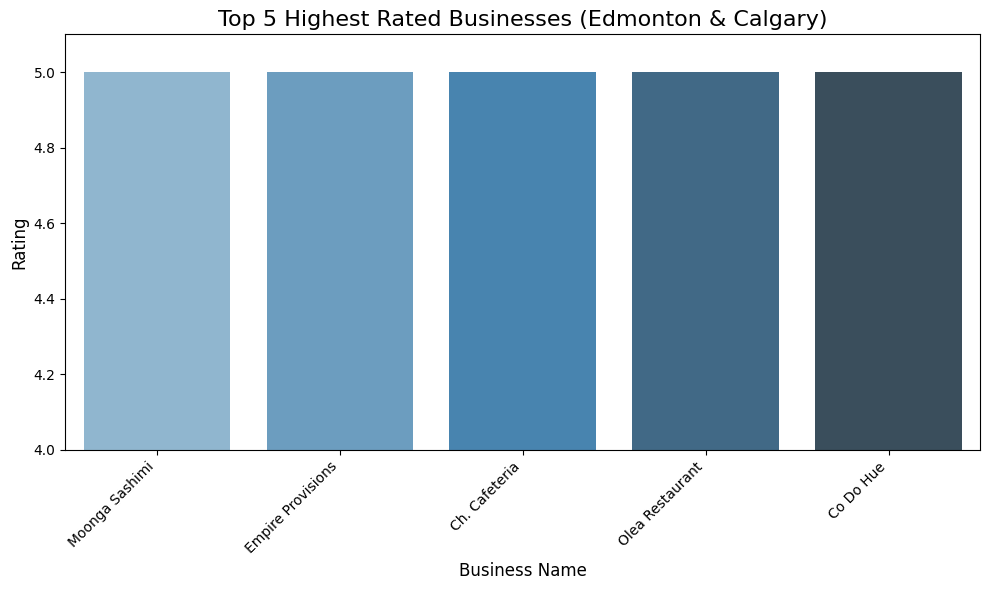

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get Top 5 Rated Businesses
top_rated_businesses = spark.sql("""
    SELECT DISTINCT name, rating, review_count, city
    FROM yelp_businesses
    WHERE city IN ('Edmonton', 'Calgary')
      AND rating >= 4.0
    ORDER BY rating DESC, review_count DESC
    LIMIT 5
""")


# Step 2: Convert to Pandas for Plotting
top_rated_businesses_pandas = top_rated_businesses.toPandas()


# Step 3: Vertical Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='name',
    y='rating',
    data=top_rated_businesses_pandas,
    palette='Blues_d'
)
plt.title('Top 5 Highest Rated Businesses (Edmonton & Calgary)', fontsize=16)
plt.xlabel('Business Name', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels to prevent overlap
plt.ylim(4.0, 5.1)  # Optional: constrain y-axis for better scale
plt.tight_layout()
plt.show()


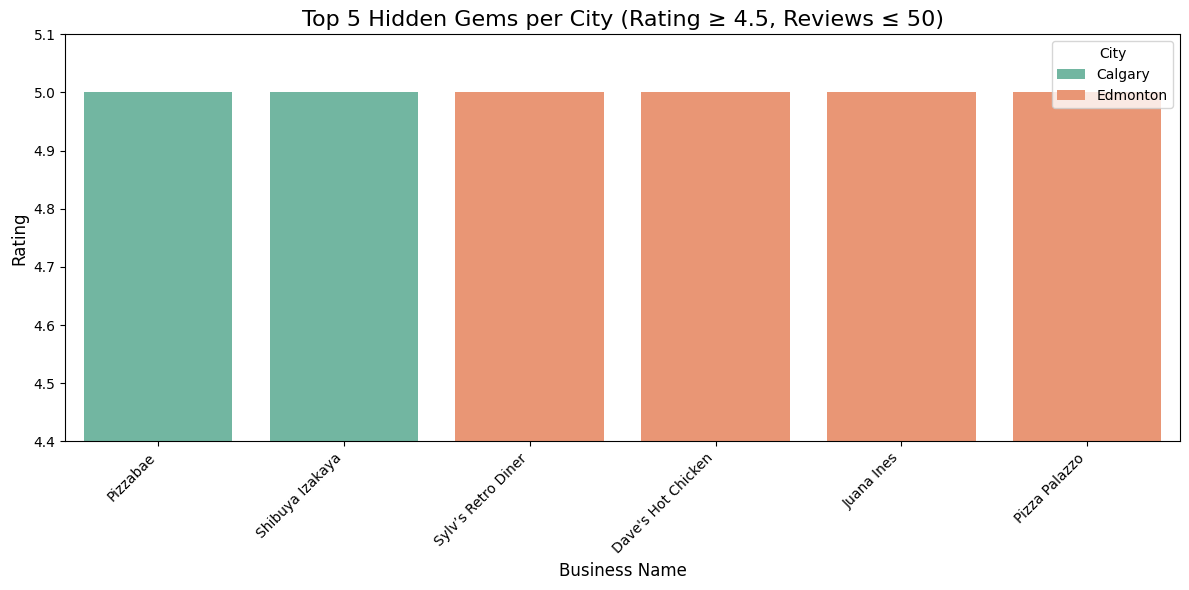

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Query Top 5 Hidden Gems per City

# Using ROW_NUMBER() to rank top 5 per city
hidden_gems = spark.sql("""
    SELECT * FROM (
        SELECT
            name,
            city,
            rating,
            review_count,
            ROW_NUMBER() OVER (PARTITION BY city ORDER BY rating DESC, review_count ASC) AS rank
        FROM yelp_businesses
        WHERE city IN ('Edmonton', 'Calgary')
            AND rating >= 4.5
            AND review_count <= 50
    )
    WHERE rank <= 5
""")


# Step 2: Convert to Pandas for Visualization

hidden_gems_pd = hidden_gems.toPandas()


# Step 3: Plot as Vertical Bar Chart

plt.figure(figsize=(12, 6))
sns.barplot(
    x='name',
    y='rating',
    hue='city',
    data=hidden_gems_pd,
    palette='Set2'
)

plt.title('Top 5 Hidden Gems per City (Rating ≥ 4.5, Reviews ≤ 50)', fontsize=16)
plt.xlabel('Business Name', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(4.4, 5.1)
plt.legend(title='City')
plt.tight_layout()
plt.show()


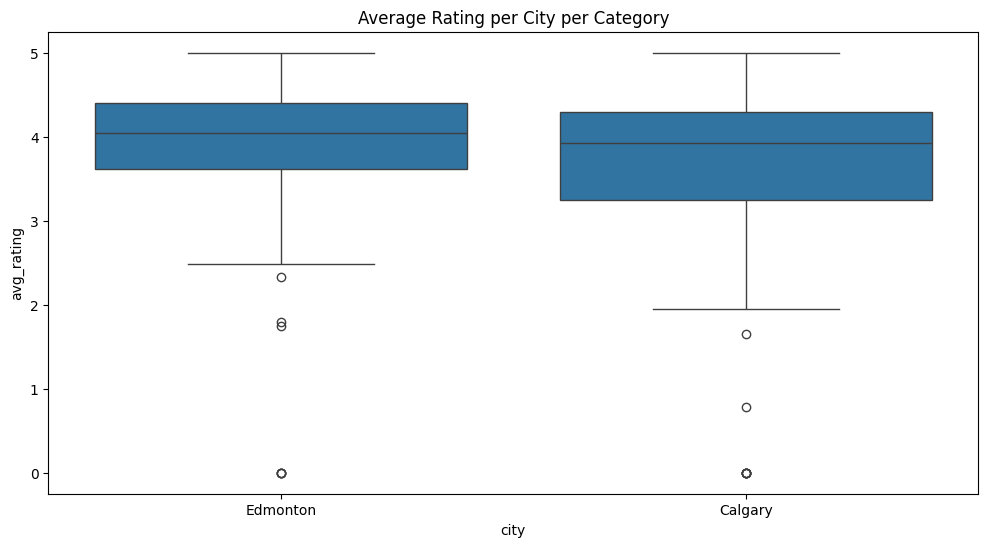

In [ ]:
avg_rating_category = spark.sql("""
    SELECT city, title AS category, ROUND(AVG(rating), 2) AS avg_rating
    FROM yelp_businesses
    WHERE city IN ('Edmonton', 'Calgary')
    GROUP BY city, title
""").toPandas()

plt.figure(figsize=(12,6))
sns.boxplot(data=avg_rating_category, x='city', y='avg_rating')
plt.title('Average Rating per City per Category')
plt.show()


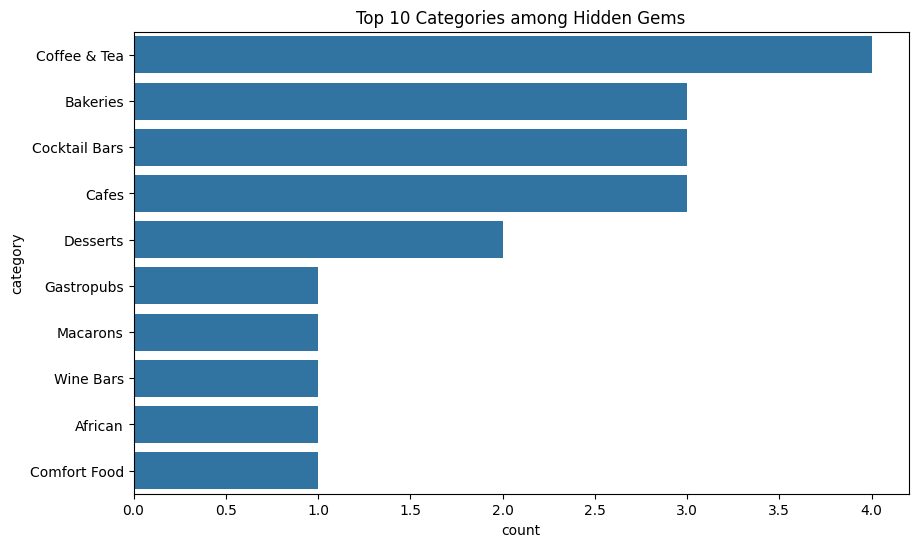

In [ ]:
hidden_gem_category = spark.sql("""
    SELECT title AS category, COUNT(*) AS count
    FROM hidden_gems
    GROUP BY title
    ORDER BY count DESC
    LIMIT 10
""").toPandas()

plt.figure(figsize=(10,6))
sns.barplot(data=hidden_gem_category, x='count', y='category')
plt.title('Top 10 Categories among Hidden Gems')
plt.show()


/usr/local/lib/python3.11/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname B identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/usr/local/lib/python3.11/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname B identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


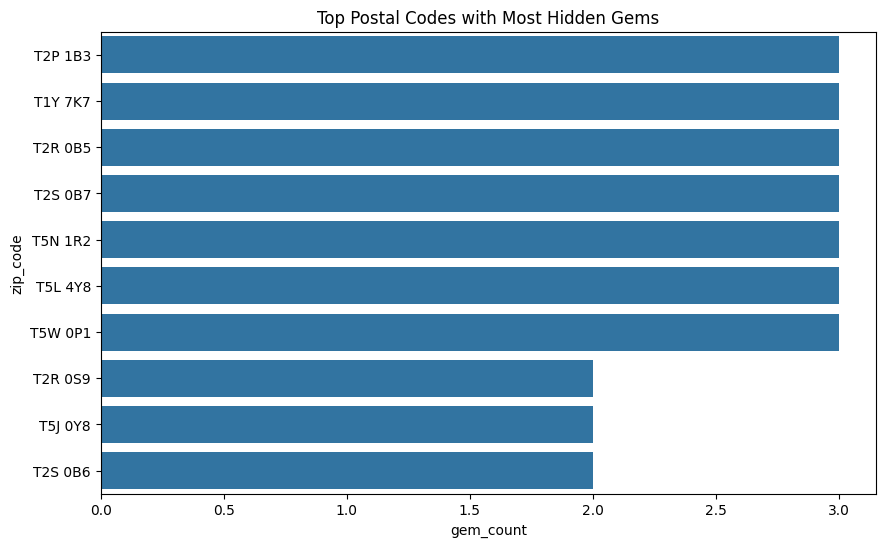

In [ ]:
total_hidden_gems_postal_code = spark.sql("""
    SELECT zip_code, COUNT(*) AS gem_count
    FROM hidden_gems
    GROUP BY zip_code
    ORDER BY gem_count DESC
    LIMIT 10
""").toPandas()

plt.figure(figsize=(10,6))
sns.barplot(data=total_hidden_gems_postal_code, x='gem_count', y='zip_code')
plt.title('Top Postal Codes with Most Hidden Gems')
plt.show()


<ipython-input-32-e2aa7b29f03b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=compare_type, x='type', y='avg_rating', palette='Set2')


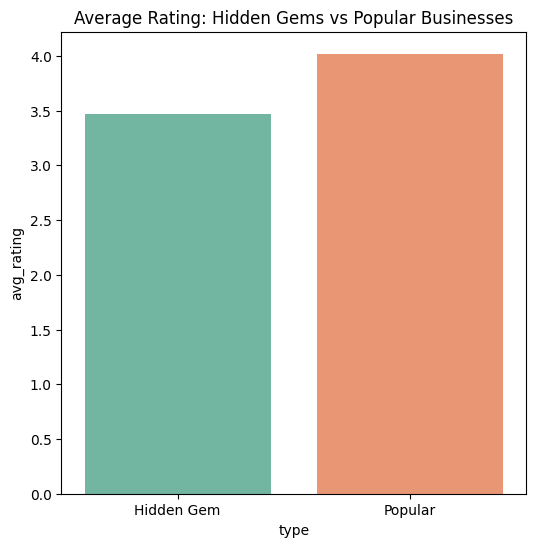

In [ ]:
compare_type = spark.sql("""
    SELECT CASE
             WHEN review_count <= 50 THEN 'Hidden Gem'
             ELSE 'Popular'
           END AS type,
           ROUND(AVG(rating), 2) AS avg_rating
    FROM yelp_businesses
    WHERE city IN ('Edmonton', 'Calgary')
    GROUP BY type
""").toPandas()

plt.figure(figsize=(6,6))
sns.barplot(data=compare_type, x='type', y='avg_rating', palette='Set2')
plt.title('Average Rating: Hidden Gems vs Popular Businesses')
plt.show()

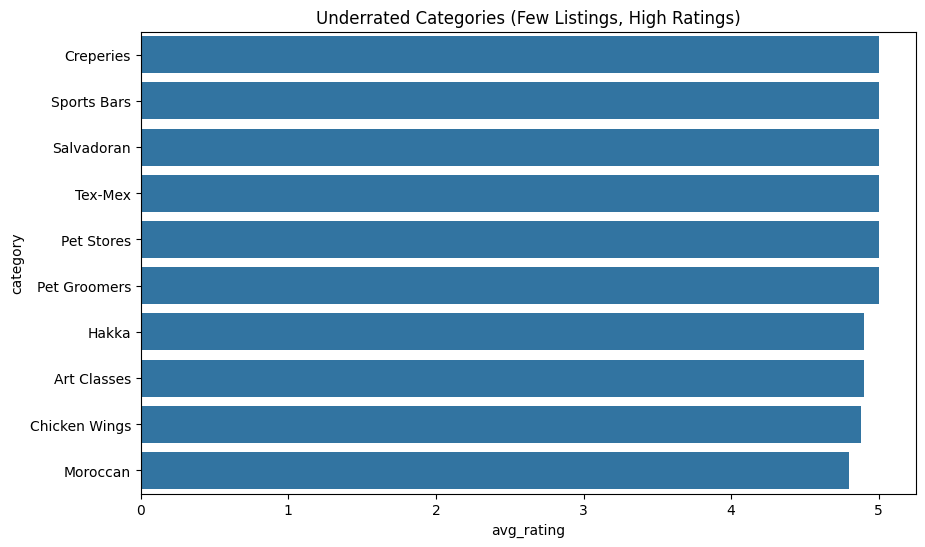

In [ ]:
underrated_category = spark.sql("""
    SELECT title AS category, COUNT(*) AS count, ROUND(AVG(rating), 2) AS avg_rating
    FROM yelp_businesses
    WHERE city IN ('Edmonton', 'Calgary')
    GROUP BY title
    HAVING count < 10 AND avg_rating >= 4.3
    ORDER BY avg_rating DESC
    LIMIT 10
""").toPandas()

plt.figure(figsize=(10,6))
sns.barplot(data=underrated_category, x='avg_rating', y='category')
plt.title('Underrated Categories (Few Listings, High Ratings)')
plt.show()

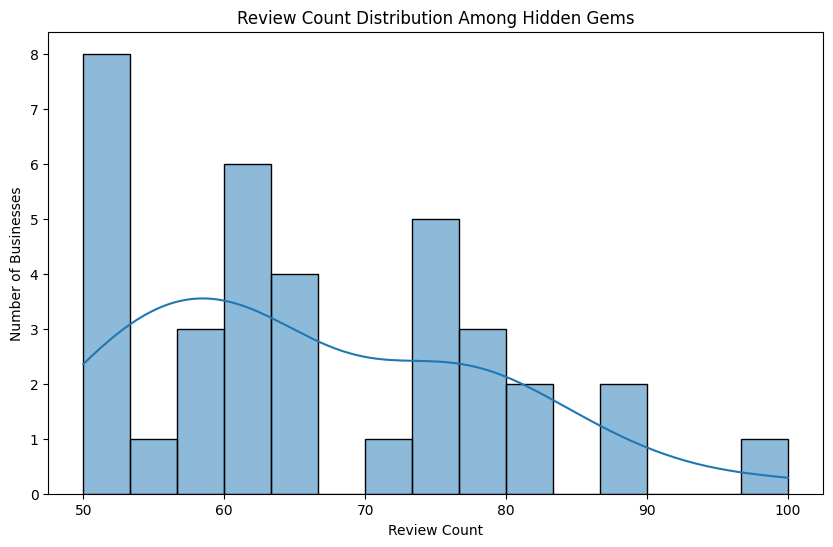

In [ ]:
review_count_dist = spark.sql("SELECT review_count FROM hidden_gems").toPandas()

plt.figure(figsize=(10,6))
sns.histplot(data=review_count_dist, x='review_count', bins=15, kde=True)
plt.title('Review Count Distribution Among Hidden Gems')
plt.xlabel('Review Count')
plt.ylabel('Number of Businesses')
plt.show()


Conclusion & Next Steps

### Conclusion
Summarize the key findings from your analysis, explaining how they support your business idea. For example:

- **Top Rated Businesses**: We identified the highest-rated businesses, which are ideal candidates for recommendation.
- **Category Insights**: Our analysis showed which categories are most popular in the Yelp dataset.

### Future Steps
- **Expand Data Collection**: Collect more data points (e.g., reviews, more businesses).
- **Improve Recommendations**: Use the data to create a recommendation algorithm.


**INSIGHTS**:  Through our hidden gems criteria, we were able to establish that there are 19 Hidden gems in Edmonton and 20 in calgary. From our data, we are able to establish the top ten hidden gems across Calgary and Edmonton. Our analysis also showed us most popularr categories in hidden gems.

**HIDDEN GEMS**:  We indetifies hidden gems in Edmonton and Calgary for people who want something unique, but high quality and also support their local businesses.

**FUTURE STEPS**:
One of the first steps we can take is to clean our data further and continue our deduplication effort to ensure the reliability of the data. Trough our cleaning we ensure a better recomendation system and the overall efficieny and accuracy.
